In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

In [2]:
#reading in CSV's from a file path
train_df = pd.read_csv('survey.csv')


#Pandas: whats the data row count?
print(train_df.shape)
    
#Pandas: whats the distribution of the data?
print(train_df.describe())
    
#Pandas: What types of data do i have?
print(train_df.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

In [3]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Timestamp                      0  0.000000
wellness_program               0  0.000000
Age                            0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment  

In [4]:
#dealing with missing data
#Let’s get rid of the variables "Timestamp",“comments”, “state” just to make our lives easier.
train_df = train_df.drop(['comments'], axis= 1)
train_df = train_df.drop(['state'], axis= 1)
train_df = train_df.drop(['Timestamp'], axis= 1)

train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [5]:
#cleaning NaN

# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
         train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head(5)   
    

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [6]:
#clean 'Gender'
#Slower case all columm's elements
gender = train_df['Gender'].str.lower()
#print(gender)

#Select unique elements
gender = train_df['Gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]


In [7]:
print(train_df['Gender'].unique())

['female' 'male' 'trans']


In [8]:
#complete missing age with mean
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s

#Ranges of Age
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [9]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [10]:
#There are only 0.20% of self work_interfere so let's change NaN to "Don't know
#Replace "NaN" string from defaultString

train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


In [11]:
#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

#Get rid of 'Country'
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label_no_emp

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [12]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
obs_consequence                0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
phys_health_consequence        0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
anonymity                      0      0.0
seek_help                      0      0.0
wellness_program               0      0.0
care_options                   0      0.0
benefits                       0      0.0
tech_company                   0      0.0
remote_work                    0      0.0
no_employees                   0      0.0
work_interfere                 0      0.0
treatment                      0      0.0
family_history                 0      0.0
self_employed                  0  

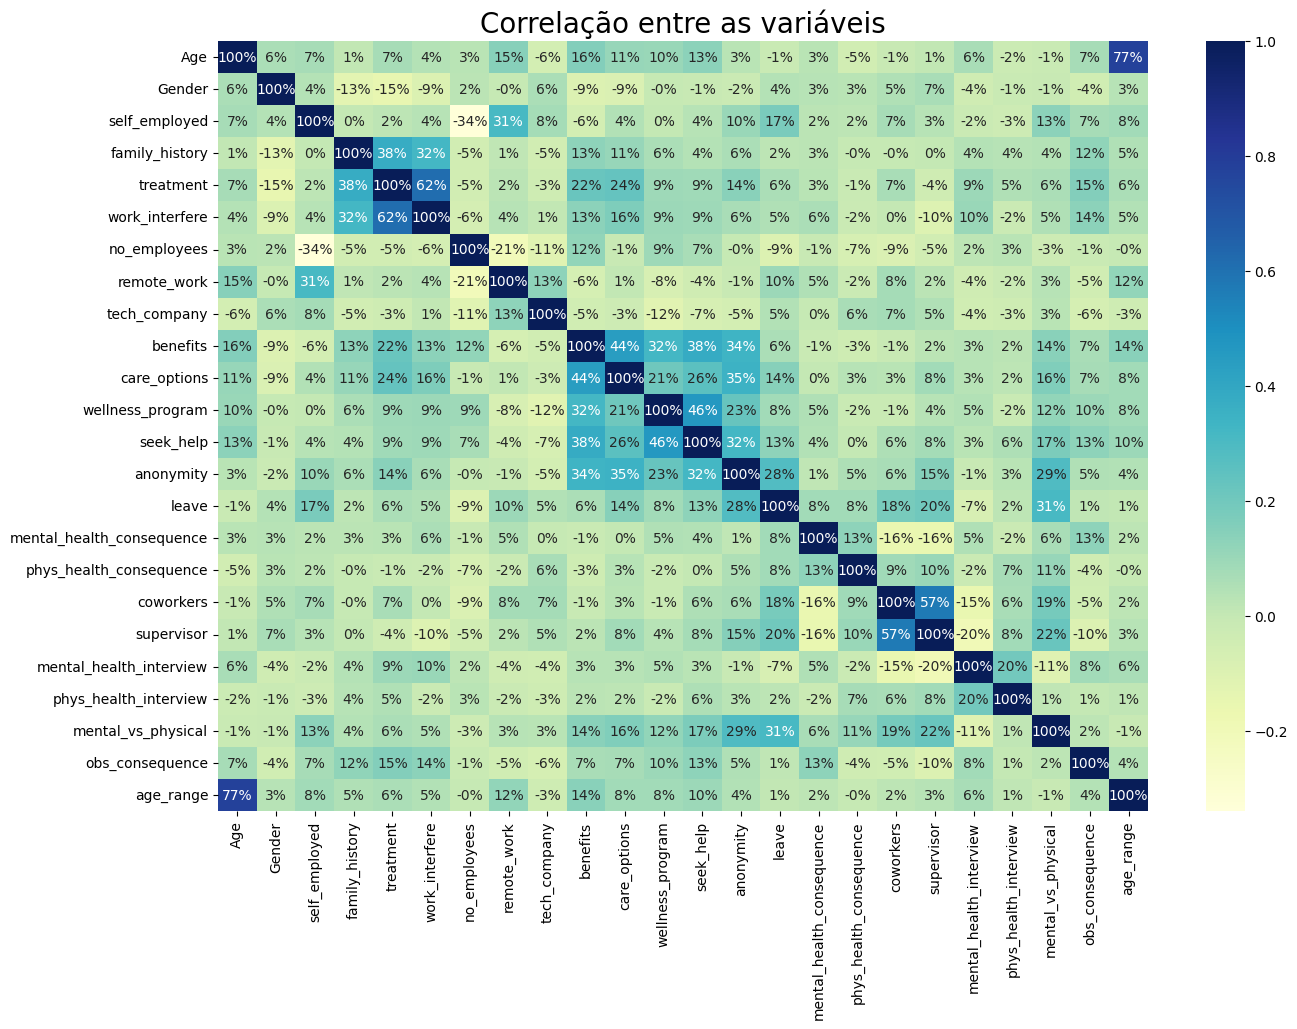

In [13]:
plt.figure(figsize=(15,10), facecolor = 'white')
sns.heatmap(train_df.corr(), annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Correlação entre as variáveis', fontsize = 20);

In [14]:
# Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [15]:
#train_df.to_csv("survey_clean.csv")

In [16]:
# define X and y
#Taking cols with more than 10% of correlation with treatment (y)
feature_cols = [ 'family_history', 'work_interfere','benefits','care_options', 'obs_consequence']
#with the coluns above I obtained (0.84, 0.81) for CML and (0.70, 0.69) for QML


#Taking cols with more than 20% correlation
#feature_cols = [ 'family_history', 'work_interfere','benefits','care_options']
#Here the score for CML was (0.84, 0.81) and for QML (0.64, 0.62) for 200 interations


X = train_df[feature_cols]
y = train_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


y_train_reshape = y_train.values.reshape(-1, 1)
# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
#methodDict = {}
#rmseDict = ()

#with open('survey.npy', 'wb') as f:
 #   np.save(f, X_train)
  #  np.save(f, y_train)
    


In [17]:
from sklearn.svm import SVC

svc = SVC()
_ = svc.fit(X_train, y_train_reshape)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
train_score_c4 = svc.score(X_train, y_train_reshape)
test_score_c4 = svc.score(X_test, y_test)


In [19]:
print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.84
Classical SVC on the test dataset:     0.81


In [20]:
#As can be seen from the scores, the classical SVC algorithm performs 72%, which is a good result. 
#Next up, it’s time to look at quantum machine learning models.

#We decompose the feature map into its constituent gates to give the reader a flavor of how feature maps may look.

from qiskit.circuit.library import ZZFeatureMap

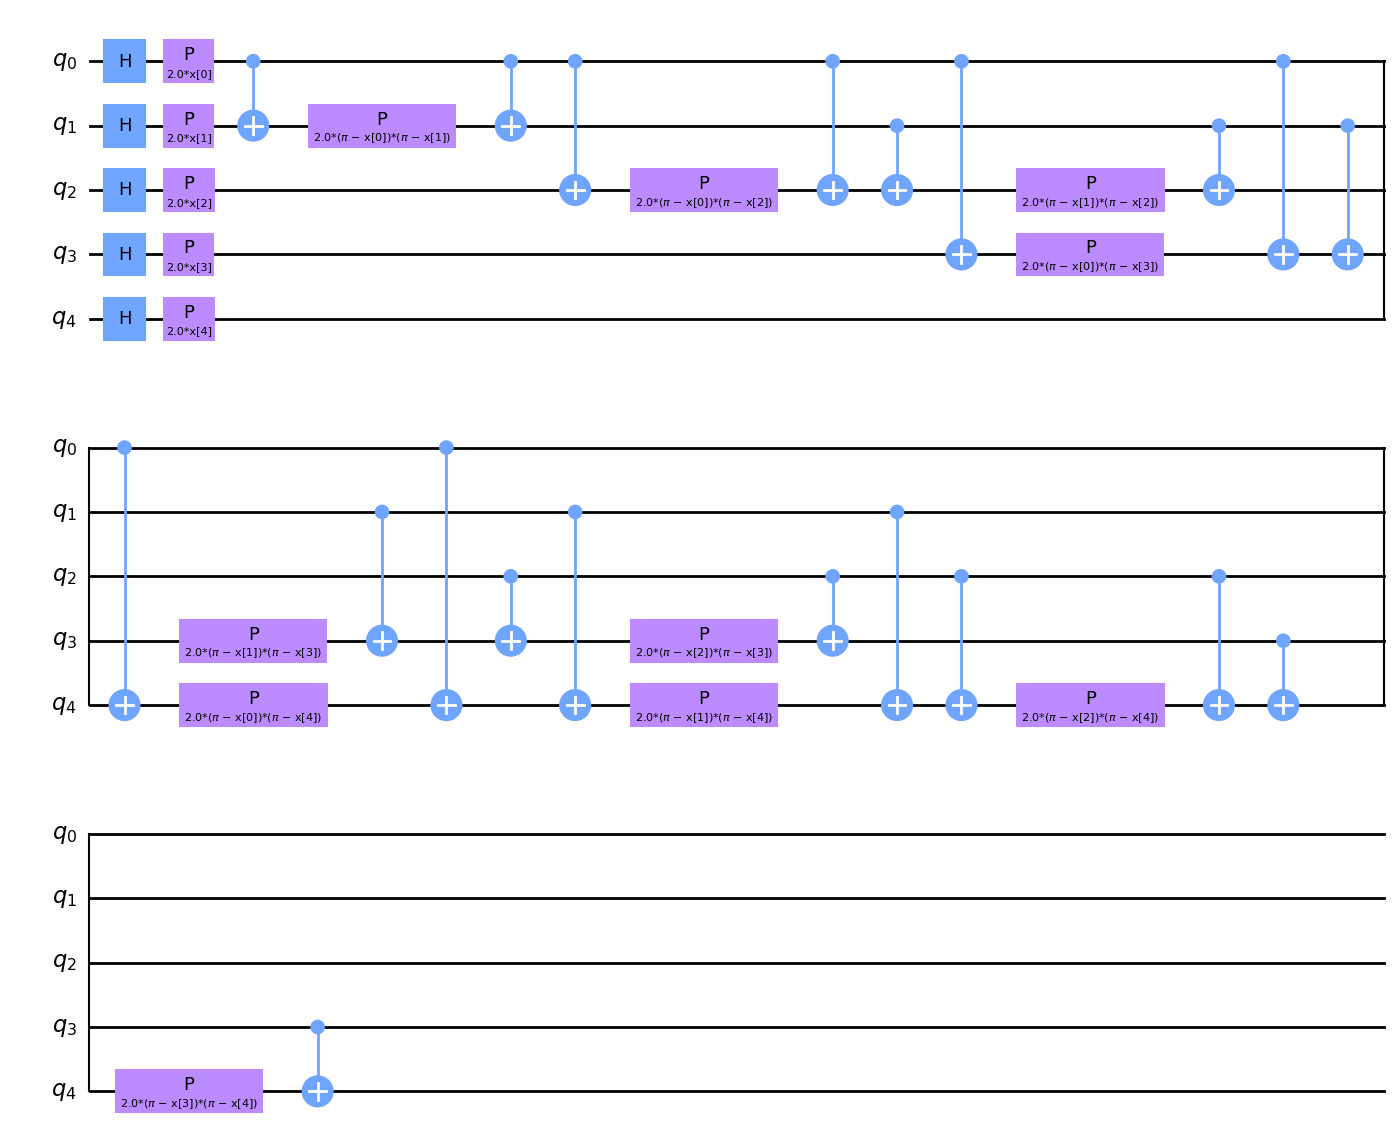

In [21]:
num_features = X.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20)

In [22]:
#features.

#Now we create and plot our ansatz. Pay attention to the repetitive structure of the ansatz circuit. We define the number 
#of these repetitions using the reps parameter.

from qiskit.circuit.library import RealAmplitudes

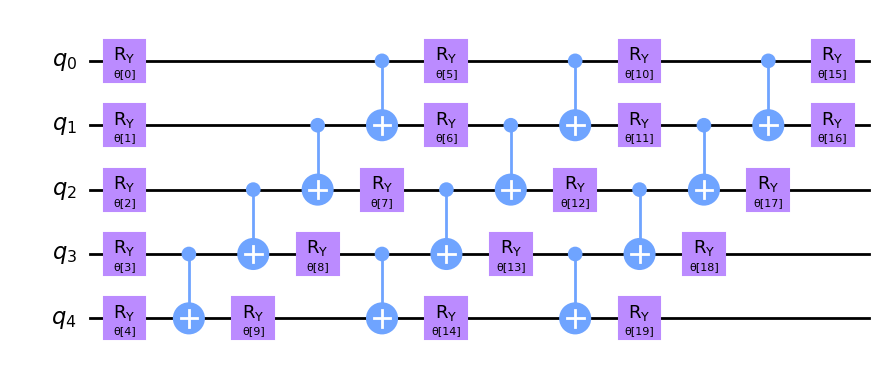

In [23]:
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [24]:
from qiskit.algorithms.optimizers import COBYLA

maxiter=400

optimizer = COBYLA(maxiter=maxiter)

In [25]:
#In the next step, we define where to train our classifier. We can train on a simulator or a real quantum computer. Here, 
#we will use a simulator. We create an instance of the Sampler primitive. This is the reference implementation that is 
#statevector based. Using qiskit runtime services you can create a sampler that is backed by a quantum computer.

from qiskit.primitives import Sampler


sampler = Sampler()

In [26]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [28]:
objective_func_vals = []
#plt.rcParams["figure.figsize"] = (12, 6)


#def callback_graph(weights, obj_func_eval):
 #   clear_output(wait=True)
  #  objective_func_vals.append(obj_func_eval)
   # plt.title("Objective function value against iteration")
    #plt.xlabel("Iteration")
    #plt.ylabel("Objective function value")
    #plt.plot(range(len(objective_func_vals)), objective_func_vals)
    #plt.show()






#maxiter = 20

def callback_graph(weights,  obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)

    plt.title("COBYLA (5 features)")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")

    stage1_len = np.min((len(objective_func_vals), maxiter))
    stage1_x = np.linspace(1, stage1_len, stage1_len)
    stage1_y = objective_func_vals[:stage1_len]

    stage2_len = np.max((0, len(objective_func_vals) - maxiter))
    stage2_x = np.linspace(maxiter, maxiter + stage2_len - 1, stage2_len)
    stage2_y = objective_func_vals[maxiter : maxiter + stage2_len]
    
    #stage3_len = np.max((0, len(objective_func_vals) - maxiter))
    #stage3_x = np.linspace(maxiter, maxiter + stage3_len - 1, stage3_len)
    #stage3_y = objective_func_vals[maxiter : maxiter + stage3_len]


    plt.plot(stage1_x, stage1_y, color="orange")
    plt.plot(stage2_x, stage2_y, color="purple")
    #plt.plot(stage3_x, stage3_y, color="blue")
    plt.show()


#plt.figure(figsize=(15,10), facecolor='white')
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["figure.facecolor"] = ("white")

In [29]:
from qiskit_machine_learning.algorithms.classifiers import VQC

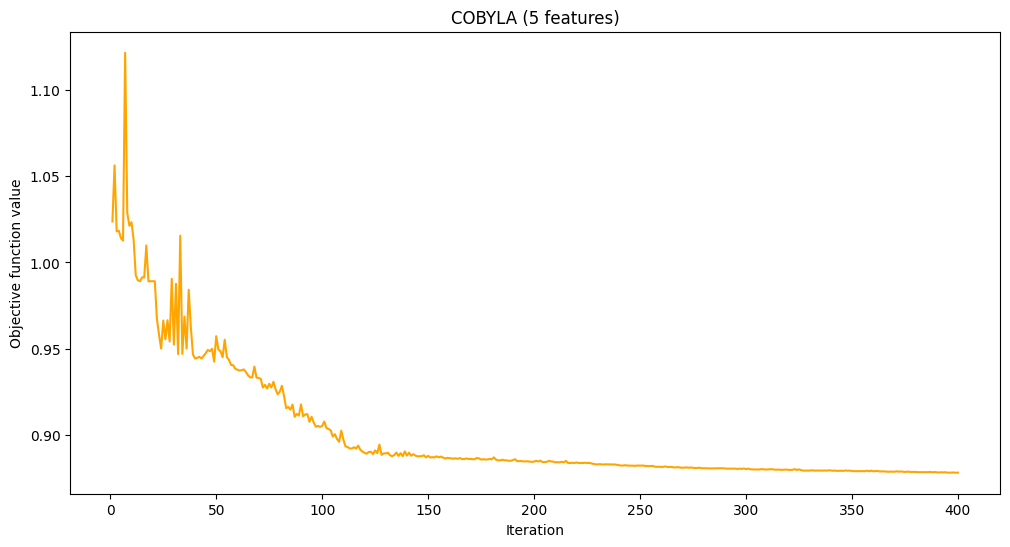

In [30]:
original_classifier = VQC(sampler=sampler, feature_map=feature_map, ansatz=ansatz, optimizer=optimizer,
                          callback=callback_graph)

# clear objective value history
objective_func_vals = []




#start = time.time()
original_classifier.fit(X_train, y_train_reshape)

In [31]:
train_score_q4 = original_classifier.score(X_train, y_train_reshape)
print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")

Quantum VQC on the training dataset: 0.68


In [32]:
test_score_q4 = original_classifier.score(X_test, y_test)
#print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the test dataset:     0.69


In [33]:
#from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
#from IPython.display import clear_output


original_classifier.save("vqc_classifier.model")

In [32]:
#loaded_classifier = VQC.load("vqc_classifier.model")

In [33]:
#sampler2 = Sampler()
#loaded_classifier.warm_start = True
#loaded_classifier.neural_network.sampler = sampler2
#loaded_classifier.optimizer = COBYLA(maxiter=100)

In [34]:
#loaded_classifier.fit(X_train, y_train_reshape)

In [35]:
#print("Train score", loaded_classifier.score(X_train, y_train_reshape))

In [36]:
#print("Test score", loaded_classifier.score(X_test, y_test))

In [37]:
# The objective function is almost flat towards the end, meaning increasing the number of iterations won’t help, and model
#performance will stay the same. Let’s see what we can do with another ansatz.

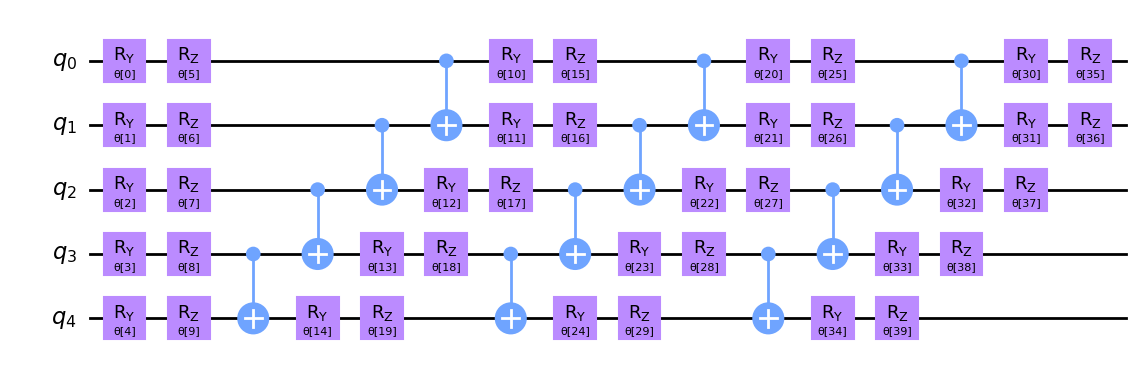

In [34]:
from qiskit.circuit.library import EfficientSU2

ansatz2 = EfficientSU2(num_qubits=num_features, reps=3)
ansatz2.decompose().draw(output="mpl", fold=20)

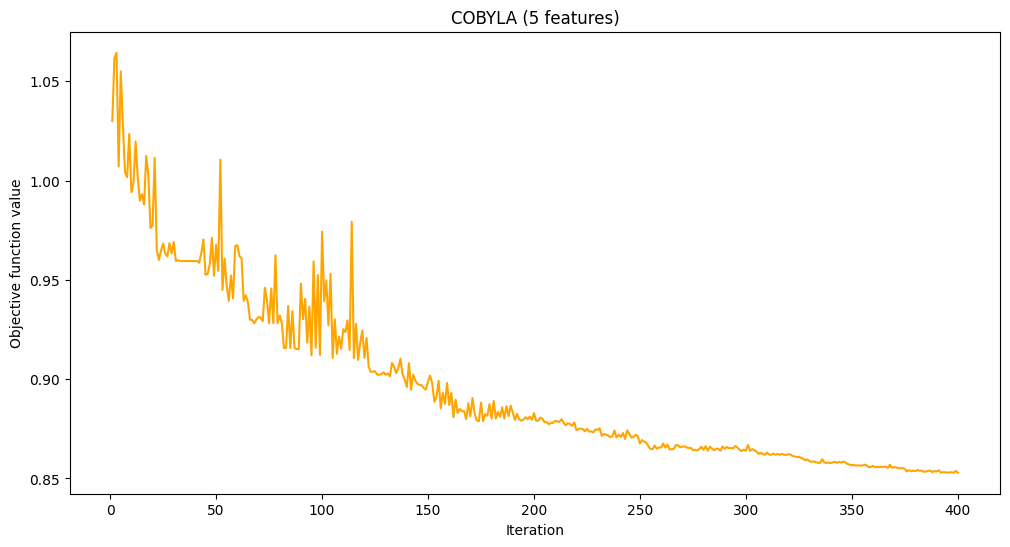

In [35]:
optimizer = COBYLA(maxiter=400)


original_classifier2 = VQC(sampler=sampler, feature_map=feature_map, ansatz=ansatz2, optimizer=optimizer,
                          callback=callback_graph)

# clear objective value history
objective_func_vals = []




#start = time.time()
original_classifier2.fit(X_train, y_train_reshape)



#vqc = VQC(
 #   sampler=sampler,
  #  feature_map=feature_map,
   # ansatz=ansatz,
    #optimizer=optimizer,
    #callback=callback_graph,
#)

# clear objective value history
#objective_func_vals = []

#start = time.time()
#vqc.fit(train_features, train_labels)
#elapsed = time.time() - start

#print(f"Training time: {round(elapsed)} seconds")

In [36]:
train_score_q42 = original_classifier2.score(X_train, y_train_reshape)
print(f"Quantum VQC on the training dataset (SU2): {train_score_q42:.2f}")

Quantum VQC on the training dataset (SU2): 0.74


In [37]:
test_score_q42 = original_classifier2.score(X_test, y_test)
#print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset (SU2):     {test_score_q42:.2f}")

Quantum VQC on the test dataset (SU2):     0.72


In [38]:
original_classifier2.save("vqc_classifier_SU2.model")

In [43]:
#loaded_classifier = VQC.load("vqc_classifierSU2.model")